# Nyquist-Shannon Sampling Theorem

This notebook provides a visual explanation of the Nyquist-Shannon sampling theorem, which is fundamental to digital signal processing and computer vision.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Create output directory for images
output_dir = '../img'
os.makedirs(output_dir, exist_ok=True)


## 1. Continuous Signal and Sampling

First, let's visualize a continuous signal and how it can be sampled at different rates.


Saved: ../img/nyquist_sampling_comparison.png


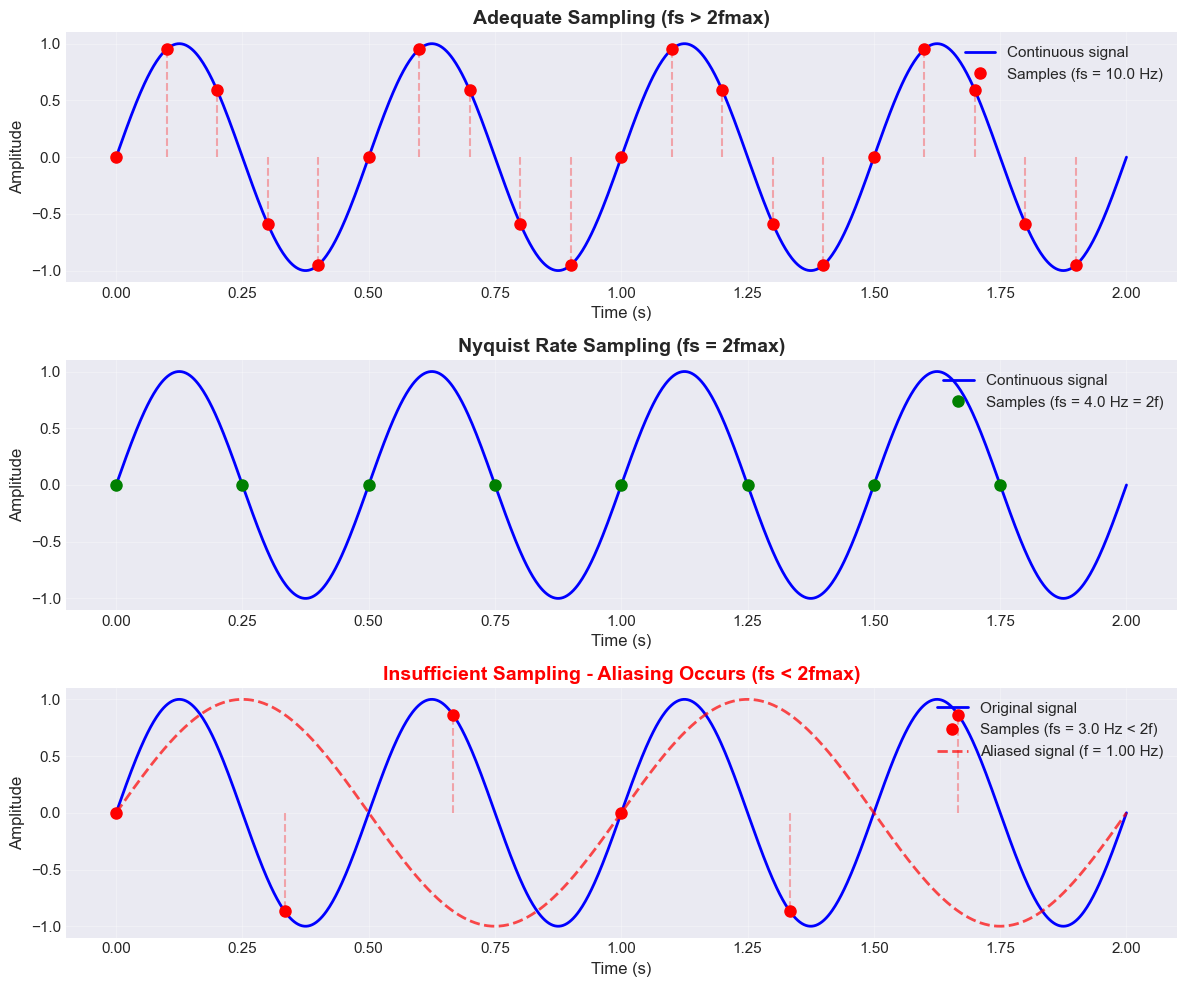

In [3]:
# Define a continuous signal: f(t) = sin(2πft) with frequency f = 2 Hz
f_signal = 2.0  # Signal frequency in Hz
t_continuous = np.linspace(0, 2, 1000)  # Continuous time
signal_continuous = np.sin(2 * np.pi * f_signal * t_continuous)

# Sampling rates
fs_nyquist = 2 * f_signal  # Nyquist rate (4 Hz)
fs_adequate = 5 * f_signal  # Adequate sampling (10 Hz)
fs_insufficient = 1.5 * f_signal  # Insufficient sampling (3 Hz)

# Time points for sampling
t_samples_nyquist = np.arange(0, 2, 1/fs_nyquist)
t_samples_adequate = np.arange(0, 2, 1/fs_adequate)
t_samples_insufficient = np.arange(0, 2, 1/fs_insufficient)

# Sampled signals
samples_nyquist = np.sin(2 * np.pi * f_signal * t_samples_nyquist)
samples_adequate = np.sin(2 * np.pi * f_signal * t_samples_adequate)
samples_insufficient = np.sin(2 * np.pi * f_signal * t_samples_insufficient)

# Create figure
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Continuous signal
axes[0].plot(t_continuous, signal_continuous, 'b-', linewidth=2, label='Continuous signal')
axes[0].plot(t_samples_adequate, samples_adequate, 'ro', markersize=8, label=f'Samples (fs = {fs_adequate} Hz)')
axes[0].vlines(t_samples_adequate, 0, samples_adequate, colors='r', linestyles='--', alpha=0.3)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Adequate Sampling (fs > 2fmax)', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Nyquist rate sampling
axes[1].plot(t_continuous, signal_continuous, 'b-', linewidth=2, label='Continuous signal')
axes[1].plot(t_samples_nyquist, samples_nyquist, 'go', markersize=8, label=f'Samples (fs = {fs_nyquist} Hz = 2f)')
axes[1].vlines(t_samples_nyquist, 0, samples_nyquist, colors='g', linestyles='--', alpha=0.3)
axes[1].set_xlabel('Time (s)', fontsize=12)
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].set_title('Nyquist Rate Sampling (fs = 2fmax)', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

# Plot 3: Insufficient sampling (aliasing)
axes[2].plot(t_continuous, signal_continuous, 'b-', linewidth=2, label='Original signal')
axes[2].plot(t_samples_insufficient, samples_insufficient, 'ro', markersize=8, label=f'Samples (fs = {fs_insufficient} Hz < 2f)')
axes[2].vlines(t_samples_insufficient, 0, samples_insufficient, colors='r', linestyles='--', alpha=0.3)
# Show aliased signal
t_alias = np.linspace(0, 2, 1000)
alias_freq = fs_insufficient - f_signal
signal_alias = np.sin(2 * np.pi * alias_freq * t_alias)
axes[2].plot(t_alias, signal_alias, 'r--', linewidth=2, alpha=0.7, label=f'Aliased signal (f = {alias_freq:.2f} Hz)')
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].set_title('Insufficient Sampling - Aliasing Occurs (fs < 2fmax)', fontsize=14, fontweight='bold', color='red')
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/nyquist_sampling_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/nyquist_sampling_comparison.pdf', bbox_inches='tight')
print(f"Saved: {output_dir}/nyquist_sampling_comparison.png")
plt.show()


## 2. Frequency Domain Representation

The Nyquist-Shannon theorem can be better understood in the frequency domain. Let's visualize the frequency spectrum and how sampling affects it.


Saved: ../img/nyquist_frequency_domain.png


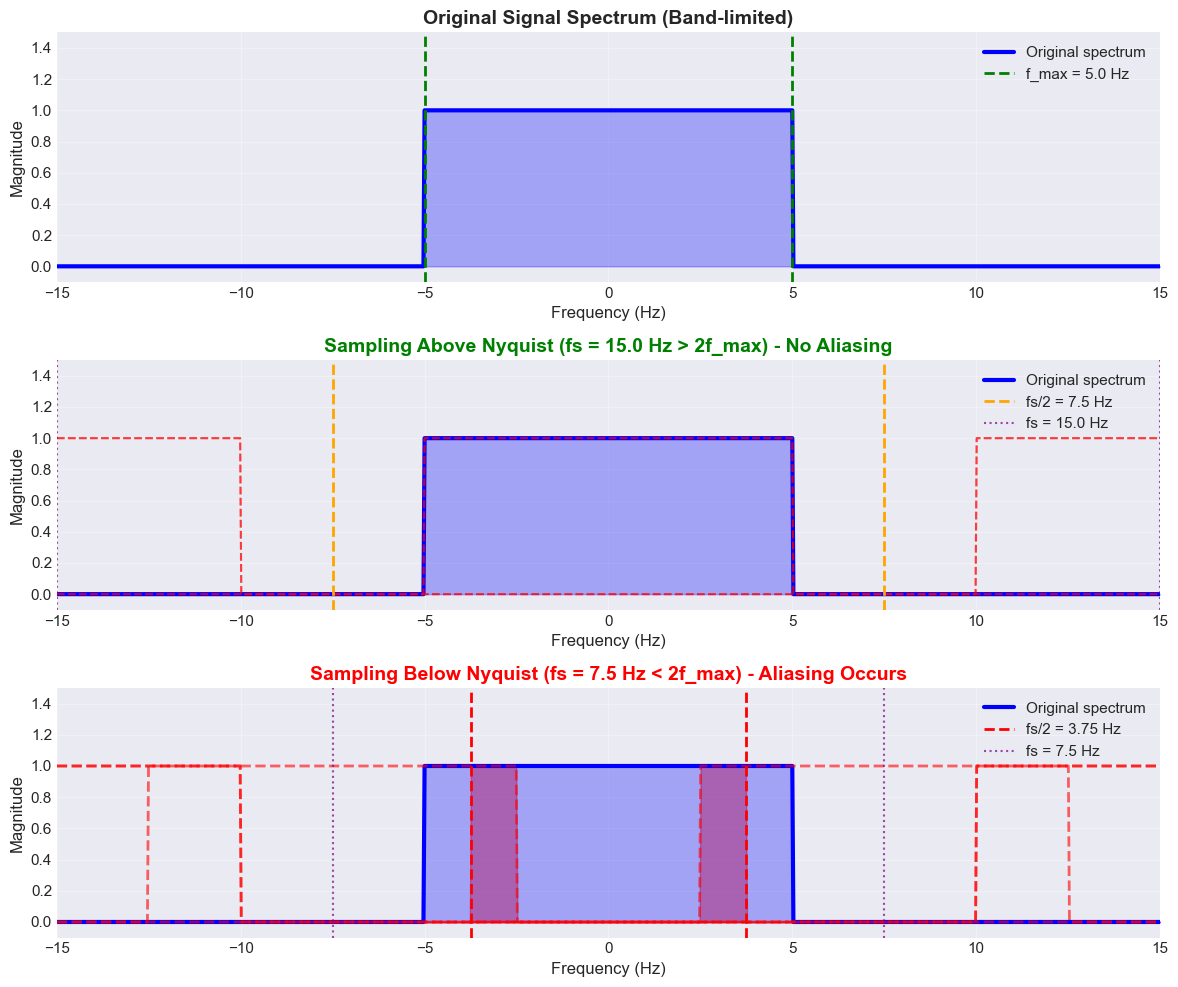

In [4]:
# Frequency domain visualization
f_max = 5.0  # Maximum frequency in the signal
freqs = np.linspace(-15, 15, 1000)

# Original signal spectrum (band-limited)
spectrum_original = np.zeros_like(freqs)
spectrum_original[(freqs >= -f_max) & (freqs <= f_max)] = 1.0

# Sampling frequencies
fs1 = 2 * f_max  # Nyquist rate
fs2 = 3 * f_max  # Above Nyquist
fs3 = 1.5 * f_max  # Below Nyquist (aliasing)

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Original spectrum
axes[0].plot(freqs, spectrum_original, 'b-', linewidth=3, label='Original spectrum')
axes[0].axvline(x=f_max, color='g', linestyle='--', linewidth=2, label=f'f_max = {f_max} Hz')
axes[0].axvline(x=-f_max, color='g', linestyle='--', linewidth=2)
axes[0].fill_between(freqs, 0, spectrum_original, alpha=0.3, color='blue')
axes[0].set_xlabel('Frequency (Hz)', fontsize=12)
axes[0].set_ylabel('Magnitude', fontsize=12)
axes[0].set_title('Original Signal Spectrum (Band-limited)', fontsize=14, fontweight='bold')
axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-0.1, 1.5)
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Sampling above Nyquist rate
axes[1].plot(freqs, spectrum_original, 'b-', linewidth=3, label='Original spectrum')
# Show periodic replicas
for n in range(-2, 3):
    if n != 0:
        axes[1].plot(freqs, np.roll(spectrum_original, int(n * fs2 * len(freqs) / 30)), 
                    'r--', linewidth=1.5, alpha=0.5)
axes[1].axvline(x=fs2/2, color='orange', linestyle='--', linewidth=2, label=f'fs/2 = {fs2/2} Hz')
axes[1].axvline(x=-fs2/2, color='orange', linestyle='--', linewidth=2)
axes[1].axvline(x=fs2, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, label=f'fs = {fs2} Hz')
axes[1].axvline(x=-fs2, color='purple', linestyle=':', linewidth=1.5, alpha=0.7)
axes[1].fill_between(freqs, 0, spectrum_original, alpha=0.3, color='blue')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title(f'Sampling Above Nyquist (fs = {fs2} Hz > 2f_max) - No Aliasing', 
                  fontsize=14, fontweight='bold', color='green')
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-0.1, 1.5)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

# Plot 3: Sampling below Nyquist rate (aliasing)
axes[2].plot(freqs, spectrum_original, 'b-', linewidth=3, label='Original spectrum')
# Show overlapping replicas (aliasing)
for n in range(-2, 3):
    if n != 0:
        shifted = np.roll(spectrum_original, int(n * fs3 * len(freqs) / 30))
        axes[2].plot(freqs, shifted, 'r--', linewidth=2, alpha=0.6)
        # Highlight overlap region
        overlap_region = (freqs >= -fs3/2) & (freqs <= fs3/2)
        overlap_signal = shifted * overlap_region.astype(float)
        if np.any(overlap_signal > 0):
            axes[2].fill_between(freqs, 0, overlap_signal, alpha=0.4, color='red')
axes[2].axvline(x=fs3/2, color='red', linestyle='--', linewidth=2, label=f'fs/2 = {fs3/2} Hz')
axes[2].axvline(x=-fs3/2, color='red', linestyle='--', linewidth=2)
axes[2].axvline(x=fs3, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, label=f'fs = {fs3} Hz')
axes[2].axvline(x=-fs3, color='purple', linestyle=':', linewidth=1.5, alpha=0.7)
axes[2].fill_between(freqs, 0, spectrum_original, alpha=0.3, color='blue')
axes[2].set_xlabel('Frequency (Hz)', fontsize=12)
axes[2].set_ylabel('Magnitude', fontsize=12)
axes[2].set_title(f'Sampling Below Nyquist (fs = {fs3} Hz < 2f_max) - Aliasing Occurs', 
                  fontsize=14, fontweight='bold', color='red')
axes[2].set_xlim(-15, 15)
axes[2].set_ylim(-0.1, 1.5)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/nyquist_frequency_domain.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/nyquist_frequency_domain.pdf', bbox_inches='tight')
print(f"Saved: {output_dir}/nyquist_frequency_domain.png")
plt.show()


## 3. Visual Summary: The Nyquist Criterion

A clear visualization showing the relationship between signal frequency and required sampling rate.


Saved: ../img/nyquist_criterion.png


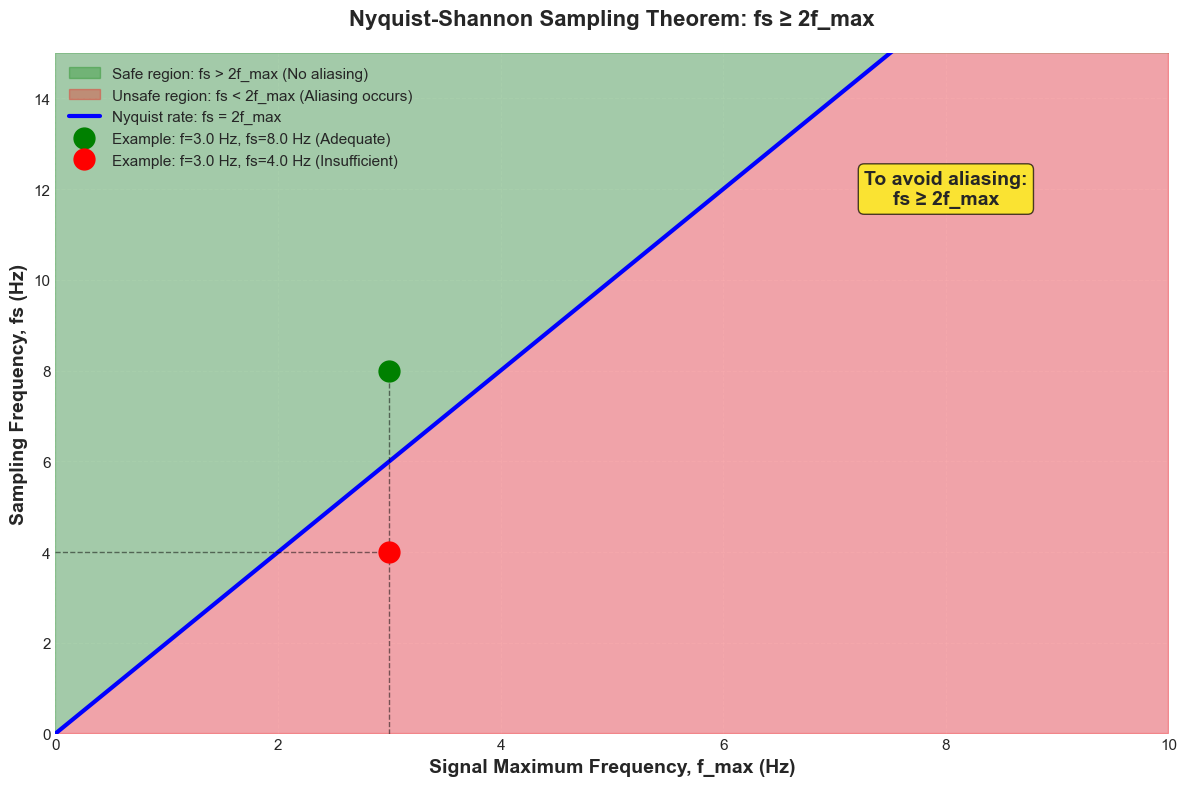

In [5]:
# Create a summary diagram
fig, ax = plt.subplots(figsize=(12, 8))

# Signal frequency range
f_max = 5.0
freq_range = np.linspace(0, 10, 1000)

# Nyquist rate line (fs = 2f)
nyquist_line = 2 * freq_range

# Safe region (fs > 2f)
safe_region = freq_range * 2.5
# Unsafe region (fs < 2f)
unsafe_region = freq_range * 1.5

# Plot regions
ax.fill_between(freq_range, nyquist_line, 15, alpha=0.3, color='green', 
                label='Safe region: fs > 2f_max (No aliasing)')
ax.fill_between(freq_range, 0, nyquist_line, alpha=0.3, color='red', 
                label='Unsafe region: fs < 2f_max (Aliasing occurs)')

# Plot Nyquist line
ax.plot(freq_range, nyquist_line, 'b-', linewidth=3, label='Nyquist rate: fs = 2f_max')

# Mark a specific example
example_f = 3.0
example_fs_adequate = 8.0
example_fs_insufficient = 4.0

ax.plot(example_f, example_fs_adequate, 'go', markersize=15, zorder=5, 
        label=f'Example: f={example_f} Hz, fs={example_fs_adequate} Hz (Adequate)')
ax.plot(example_f, example_fs_insufficient, 'ro', markersize=15, zorder=5, 
        label=f'Example: f={example_f} Hz, fs={example_fs_insufficient} Hz (Insufficient)')
ax.plot([example_f, example_f], [0, example_fs_adequate], 'k--', alpha=0.5, linewidth=1)
ax.plot([0, example_f], [example_fs_insufficient, example_fs_insufficient], 'k--', alpha=0.5, linewidth=1)

ax.set_xlabel('Signal Maximum Frequency, f_max (Hz)', fontsize=14, fontweight='bold')
ax.set_ylabel('Sampling Frequency, fs (Hz)', fontsize=14, fontweight='bold')
ax.set_title('Nyquist-Shannon Sampling Theorem: fs ≥ 2f_max', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

# Add text annotation
ax.text(8, 12, 'To avoid aliasing:\nfs ≥ 2f_max', 
        fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
        ha='center', va='center')

plt.tight_layout()
plt.savefig(f'{output_dir}/nyquist_criterion.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/nyquist_criterion.pdf', bbox_inches='tight')
print(f"Saved: {output_dir}/nyquist_criterion.png")
plt.show()
